# 1.Introduction

目標：基礎的な最適化手法を試してみよう！

In [104]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
from visualizer import Field, Adventurer

## SGD (Stochastic Gradient Descent)

勾配 $dL/dW$ と学習率 $\eta$ によってパラメータを更新していく手法

$$
W \leftarrow W - \eta\frac{\partial L}{\partial W}
$$

In [106]:
# SGDの実装
class SGD:
    def __init__(self, lr=0.1):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]  # 学習率 * 勾配 だけパラメータの値を減らす

### 可視化してみよう！

In [107]:
def x2_y2(x, y):
    return x ** 2 + y ** 2

In [108]:
field = Field(
    x2_y2,   # z = x^2 + y^2
    (-1, 1), # xの範囲
    (-1, 1)  # yの範囲
)

In [109]:
# adventurer：冒険者
# スタート地点を与える
adventurer = Adventurer(-0.5, 0.2)

# method：最適化の手法
method = SGD()

# パラメータを最適化させる
adventurer.optimize(field, method)

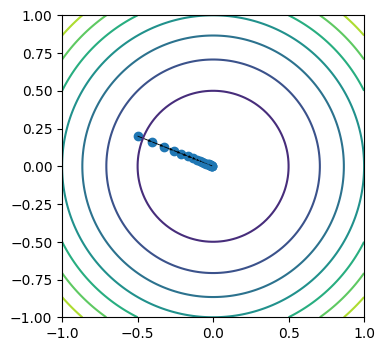

In [110]:
# adventurerがたどった道筋を取得
route = adventurer.route

# routeをフィールドに表示
field.plot(route=route)

### SGDの弱点は？？

↓こんなとき

In [111]:
# SGDに強い関数
def anti_SGD(x, y):
    return x ** 2 / 20 + y ** 2

In [112]:
field = Field(anti_SGD, (-1, 1), (-0.5, 0.5))
adventurer = Adventurer(-0.5, 0.2)  # 冒険者の初期値は(-0.5, 0.2)
sgd = SGD(lr=1)  # 学習率を1に設定

In [113]:
adventurer.optimize(field, sgd)
adventurer.route

[{'x': -0.5, 'y': 0.2},
 {'x': -0.4512195121951219, 'y': -0.18095238095238125},
 {'x': -0.4071980963712075, 'y': 0.16371882086167866},
 {'x': -0.3674714528227969, 'y': -0.14812655220818577},
 {'x': -0.3316205793766704, 'y': 0.1340192615216922},
 {'x': -0.2992673521204098, 'y': -0.12125552232914993},
 {'x': -0.2700705372793942, 'y': 0.10970737734542141},
 {'x': -0.24372219217896546, 'y': -0.0992590556934764},
 {'x': -0.21994441733223707, 'y': 0.08980581229409762},
 {'x': -0.19848642539738473, 'y': -0.08125287778989784},
 {'x': -0.17912189609032286, 'y': 0.07351450847657418},
 {'x': -0.1616465891546816, 'y': -0.06651312671690038},
 {'x': -0.14587619021276146, 'y': 0.0601785432200527},
 {'x': -0.13164436677737013, 'y': -0.05444725338957147},
 {'x': -0.11880101392104135, 'y': 0.04926180068580273},
 {'x': -0.10721067109947634, 'y': -0.04457020062048815},
 {'x': -0.09675109343123474, 'y': 0.04032541960901309},
 {'x': -0.08731196236477282, 'y': -0.03648490345577375},
 {'x': -0.078793722134063

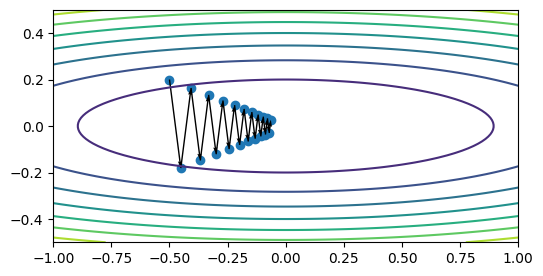

In [114]:
field.plot(adventurer.route)

## Momentum

**運動量**をもとにしたパラメータ更新手法です。式はこんな感じ

速度の更新
$$
v \leftarrow \alpha v - \eta\frac{\partial L}{\partial W}
$$

パラメータの更新
$$
W \leftarrow W + v
$$

物理好きの方ならピントくるのでは？？

In [115]:
# Momentumの実装
class Momentum:
    def __init__(self, lr=0.1, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v == None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

In [116]:
# SGDに強いフィールド
field = Field(anti_SGD, (-1, 1), (-0.5, 0.5))

# さっきのフィールドで可視化してみる
adventurer2 = Adventurer(-0.5, 0.2)

# momentumを使う
momentum = Momentum()

In [117]:
# momentumで最適化
adventurer2.optimize(field, momentum)

adventurer2.route

[{'x': -0.5, 'y': 0.2},
 {'x': -0.4951219512195122, 'y': 0.16190476190476188},
 {'x': -0.485901249256395, 'y': 0.09678004535147389},
 {'x': -0.4728621174968442, 'y': 0.019733506100853004},
 {'x': -0.45651360996205975, 'y': -0.05336714229153494},
 {'x': -0.43734616186405073, 'y': -0.10899255588439172},
 {'x': -0.4158286667527787, 'y': -0.1382949412828406},
 {'x': -0.3924060561111433, 'y': -0.13832519456376063},
 {'x': -0.3674973547667335, 'y': -0.11200476640920567},
 {'x': -0.34149418351025995, 'y': -0.06698213984930514},
 {'x': -0.31475967880860195, 'y': -0.013703273116955579},
 {'x': -0.28762779844239167, 'y': 0.03685785420253151},
 {'x': -0.2604029812499498, 'y': 0.07534232513244485},
 {'x': -0.23336012888650876, 'y': 0.09562742989652022},
 {'x': -0.20674487757515317, 'y': 0.09566927563246994},
 {'x': -0.18077412819907798, 'y': 0.07748421762673517},
 {'x': -0.1556368037293998, 'y': 0.04635876682600529},
 {'x': -0.131494803865427, 'y': 0.009515619805156902},
 {'x': -0.1084841278525790

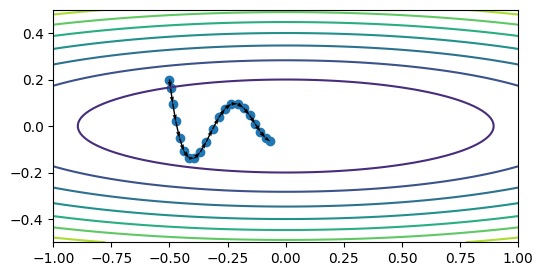

In [118]:
field.plot(adventurer2.route)